<a href="https://colab.research.google.com/github/Jorgeraul1997/primerodetodos/blob/master/Red_neuronal_clasificador_de_ropa_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#cargar librerias
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt


In [8]:
fashion_minst=keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) =fashion_minst.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [9]:
#tipos de ropa
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
#lectura de 60000 mil imagenes de ropa de 60 pixeles por 60 pixeles
train_images.shape

(60000, 28, 28)

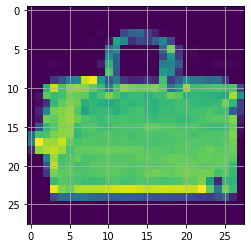

In [13]:
plt.figure()
plt.imshow(train_images[99])
plt.grid()

In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0
#esto toma los datos que necesitamos, no se necesitaran todos, sólo lo de la division:255 para entrenamiento del modelo

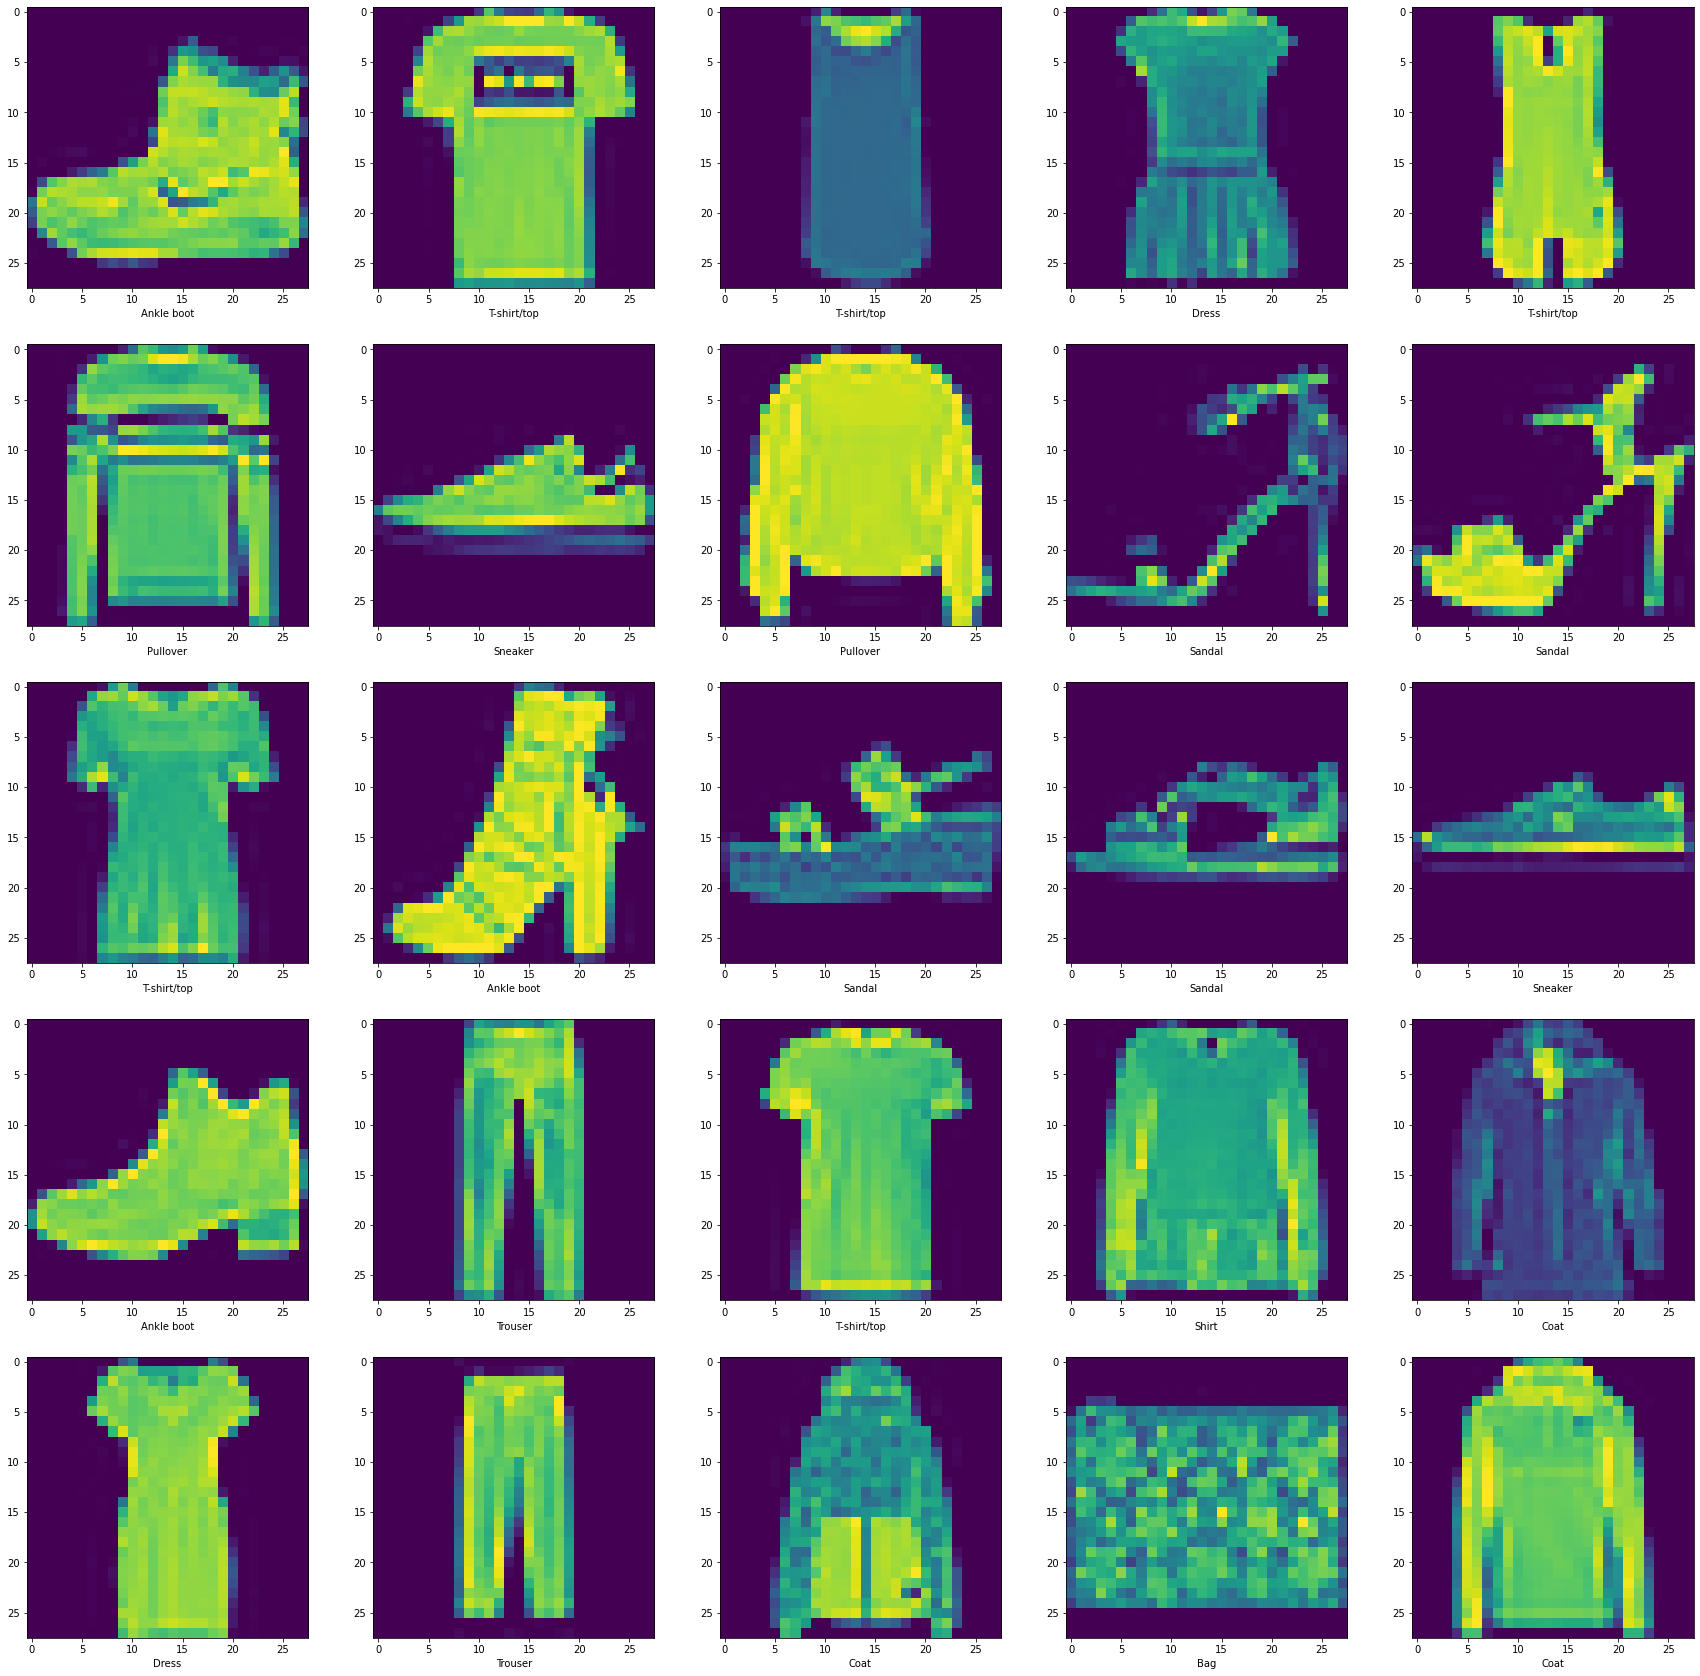

In [23]:
plt.figure(figsize=(30,30))
for i in range (25):
  plt.subplot(5,5, i+1)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])


In [30]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128,activation = tf.nn.relu),
                          keras.layers.Dense(10,activation = tf.nn.softmax)])

model.compile(optimizer = tf.compat.v1.train.AdamOptimizer(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])

model.fit(train_images,train_labels,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4960 - accuracy: 0.8248
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3730 - accuracy: 0.8658
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3344 - accuracy: 0.8781
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3115 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2956 - accuracy: 0.8915


In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3358 - accuracy: 0.8782
Accuracy  0.8781999945640564


In [32]:

predictions = model.predict(test_images)

In [33]:
predictions[0]

array([4.81408733e-06, 1.14274556e-07, 4.08224508e-07, 5.90946350e-08,
       6.96454345e-06, 1.86875835e-03, 1.50488386e-05, 4.23972607e-02,
       7.10262830e-05, 9.55635667e-01], dtype=float32)

In [34]:
np.argmax(predictions[0]) #el modelo me dice que es un 9

9

In [37]:
class_names[9]

'Ankle boot'